<a href="https://colab.research.google.com/github/andresbadillo/LiquidacionAGPE/blob/master/LiquidacionAGPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LIQUIDACIÓN AGPE
---



### 1. En este primer paso se cargan las **matrices** con el siguiente formato de tabla:

> Cargar el archivo como: Consumos_AGPE_Condominio_{`mmaaaa`}.xlsx

  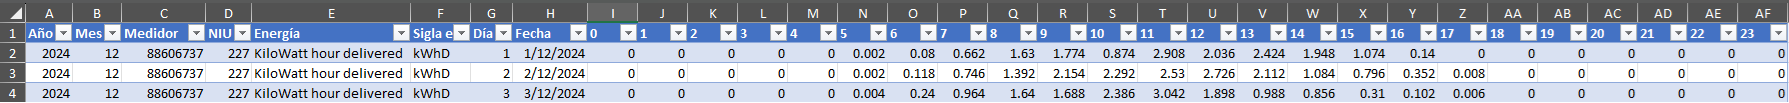

> kWhD: Energía activa `exportada`

> kWhR: Energía activa `importada`

> kVarhD: Energía reactiva `capacitiva`

> kVarhR: Energía reactiva `inductiva`

In [ ]:
# Paso 1: Importar librerías necesarias
import pandas as pd
from google.colab import files

# Paso 2: Crear una función para cargar y leer el archivo Excel
def cargar_matriz_consumo():
    print("Por favor, sube el archivo Excel con las matrices de consumo:")
    archivo_subido = files.upload()  # Sube el archivo desde tu máquina

    # Leer el archivo Excel en un DataFrame de pandas
    for nombre_archivo in archivo_subido.keys():
        try:
            df = pd.read_excel(nombre_archivo)
            print(f"Archivo '{nombre_archivo}' cargado con éxito.")
            return df
        except Exception as e:
            print(f"Error al leer el archivo '{nombre_archivo}': {e}")
            return None

# Paso 3: Llamar a la función para cargar el archivo
matriz_consumo = cargar_matriz_consumo()

# Paso 4: Mostrar una vista previa del archivo cargado, si es válido
if matriz_consumo is not None:
    print("Vista previa de los datos cargados:")
    display(matriz_consumo.head())
else:
    print("No se pudo cargar el archivo correctamente.")


Por favor, sube el archivo Excel con las matrices de consumo:


Saving Consumos_AGPE_Condominio_122024.xlsx to Consumos_AGPE_Condominio_122024.xlsx
Archivo 'Consumos_AGPE_Condominio_122024.xlsx' cargado con éxito.
Vista previa de los datos cargados:


,Año,Mes,Medidor,NIU,Energía,Sigla energía,Día,Fecha,0,1,...,14,15,16,17,18,19,20,21,22,23
0,2024,12,88606737,227,KiloWatt hour delivered,kWhD,1,2024-12-01,0.0,0.0,...,1.948,1.074,0.140,0.000,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,12,88606737,227,KiloWatt hour delivered,kWhD,2,2024-12-02,0.0,0.0,...,1.084,0.796,0.352,0.008,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,12,88606737,227,KiloWatt hour delivered,kWhD,3,2024-12-03,0.0,0.0,...,0.856,0.310,0.102,0.006,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,12,88606737,227,KiloWatt hour delivered,kWhD,4,2024-12-04,0.0,0.0,...,0.804,0.414,0.300,0.024,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,12,88606737,227,KiloWatt hour delivered,kWhD,5,2024-12-05,0.0,0.0,...,0.574,1.278,0.402,0.002,0.0,0.0,0.0,0.0,0.0,0.0


### 2. En este paso generamos una tabla de la sumatoria de energía por NIU y energía

In [ ]:
# Paso 5: Crear tabla con la sumatoria mensual por NIU, Sigla energía y añadir columnas calculadas
def crear_tabla_sumatoria_y_calculada(df):
    print("Creando tabla con la sumatoria mensual y añadiendo columnas calculadas...")
    columnas_horarias = [str(i) for i in range(24)]  # Columnas de 0 a 23
    df['Total Mensual'] = df[columnas_horarias].sum(axis=1)  # Sumar todas las columnas horarias por fila
    df = df[df['Sigla energía'].isin(['kWhD', 'kWhR'])]  # Filtrar para 'kWhD' y 'kWhR'

    tabla_sumatoria = df.pivot_table(
        index='NIU',
        columns='Sigla energía',
        values='Total Mensual',
        aggfunc='sum',
        fill_value=0
    ).reset_index().rename(columns={'kWhR': 'Energía importada', 'kWhD': 'Energía exportada'})

    tabla_sumatoria['Exc1'] = tabla_sumatoria.apply(lambda row: min(row['Energía exportada'], row['Energía importada']), axis=1)
    tabla_sumatoria['Exc2'] = tabla_sumatoria.apply(lambda row: max(0, row['Energía exportada'] - row['Energía importada']), axis=1)
    tabla_sumatoria['Consumo'] = tabla_sumatoria['Energía importada'] - tabla_sumatoria['Exc1']

    columnas_a_redondear = ['Energía importada', 'Energía exportada', 'Exc1', 'Exc2', 'Consumo']
    tabla_sumatoria[columnas_a_redondear] = tabla_sumatoria[columnas_a_redondear].round(2)

    # Reorganizar columnas
    tabla_sumatoria = tabla_sumatoria[['NIU', 'Energía importada', 'Energía exportada', 'Exc1', 'Exc2', 'Consumo']]

    print("Tabla consumos AGPE creada. Vista previa:")
    display(tabla_sumatoria.head())
    return tabla_sumatoria

# Generar la tabla de sumatoria mensual con columnas calculadas
if 'matriz_consumo' in locals():
    tabla_sumatoria_mensual = crear_tabla_sumatoria_y_calculada(matriz_consumo)

    # Exportar la tabla a Excel
    mes_anio = matriz_consumo['Fecha'].dt.strftime('%m_%Y').iloc[0]  # Obtener mes (mm) y año (AAAA) de la columna Fecha
    nombre_archivo = f"consumos_agpe_{mes_anio}.xlsx"
    tabla_sumatoria_mensual.to_excel(nombre_archivo, index=False)
    print(f"Tabla exportada a Excel con el nombre: {nombre_archivo}")

Creando tabla con la sumatoria mensual y añadiendo columnas calculadas...
Tabla consumos AGPE creada. Vista previa:


Sigla energía,NIU,Energía importada,Energía exportada,Exc1,Exc2,Consumo
0,227,1014.07,389.93,389.93,0.00,624.14
1,234,383.60,626.35,383.60,242.74,0.00
2,505,1466.10,436.05,436.05,0.00,1030.05
3,515,479.71,786.36,479.71,306.65,0.00
4,518,719.15,0.08,0.08,0.00,719.07


Tabla exportada a Excel con el nombre: consumos_agpe_12_2024.xlsx


### 3. En este paso generamos la tabla de los Excedentes 1 - Exc1

In [ ]:
# Paso 6: Construir nueva tabla ajustada por consumo horario
if 'matriz_consumo' in locals() and 'tabla_sumatoria_mensual' in locals():
    print("Construyendo nueva tabla Exc_1")

    def ajustar_consumos_por_niu(grupo, total_kWhR):
        acumulado = 0
        resultado = []

        for _, fila in grupo.iterrows():
            fila_ajustada = fila.copy()
            for hora in range(24):
                consumo_horario = fila[str(hora)]
                if acumulado + consumo_horario <= total_kWhR:
                    fila_ajustada[str(hora)] = consumo_horario
                    acumulado += consumo_horario
                else:
                    fila_ajustada[str(hora)] = total_kWhR - acumulado
                    acumulado = total_kWhR
                    break
            if acumulado >= total_kWhR:
                for hora_restante in range(hora + 1, 24):
                    fila_ajustada[str(hora_restante)] = 0
            resultado.append(fila_ajustada)

        return pd.DataFrame(resultado)

    nueva_tabla = []
    for niu, grupo in matriz_consumo.groupby('NIU'):
        if 'Energía importada' in tabla_sumatoria_mensual.columns:
            total_kWhR = tabla_sumatoria_mensual.loc[tabla_sumatoria_mensual['NIU'] == niu, 'Energía importada'].iloc[0]
            grupo_filtrado = grupo[grupo['Sigla energía'] == 'kWhD']
            nueva_tabla.append(ajustar_consumos_por_niu(grupo_filtrado, total_kWhR))

    nueva_tabla = pd.concat(nueva_tabla, ignore_index=True)
    print("Nueva tabla Exc_1 creada. Vista previa:")
    display(nueva_tabla.head())

    # Eliminar columna 'Total Mensual' si existe
    if 'Total Mensual' in nueva_tabla.columns:
        nueva_tabla = nueva_tabla.drop(columns=['Total Mensual'])

    # Exportar la nueva tabla a Excel
    nombre_archivo_ajustada = f"tabla_exc_1_{mes_anio}.xlsx"
    nueva_tabla.to_excel(nombre_archivo_ajustada, index=False)
    print(f"Nueva tabla exportada a Excel con el nombre: {nombre_archivo_ajustada}")

Construyendo nueva tabla Exc_1
Nueva tabla Exc_1 creada. Vista previa:


,Año,Mes,Medidor,NIU,Energía,Sigla energía,Día,Fecha,0,1,...,15,16,17,18,19,20,21,22,23,Total Mensual
0,2024,12,88606737,227,KiloWatt hour delivered,kWhD,1,2024-12-01,0.0,0.0,...,1.074,0.140,0.000,0.0,0.0,0.0,0.0,0.0,0.0,15.552
1,2024,12,88606737,227,KiloWatt hour delivered,kWhD,2,2024-12-02,0.0,0.0,...,0.796,0.352,0.008,0.0,0.0,0.0,0.0,0.0,0.0,16.312
2,2024,12,88606737,227,KiloWatt hour delivered,kWhD,3,2024-12-03,0.0,0.0,...,0.310,0.102,0.006,0.0,0.0,0.0,0.0,0.0,0.0,14.124
3,2024,12,88606737,227,KiloWatt hour delivered,kWhD,4,2024-12-04,0.0,0.0,...,0.414,0.300,0.024,0.0,0.0,0.0,0.0,0.0,0.0,16.704
4,2024,12,88606737,227,KiloWatt hour delivered,kWhD,5,2024-12-05,0.0,0.0,...,1.278,0.402,0.002,0.0,0.0,0.0,0.0,0.0,0.0,14.738


Nueva tabla exportada a Excel con el nombre: tabla_exc_1_12_2024.xlsx


### 4. En este paso generamos la tabla de los Excedentes 2 - Exc2

In [ ]:
# Paso 7: Crear nueva tabla ajustada hacia adelante basada en consumos horarios
if 'nueva_tabla' in locals() and 'tabla_sumatoria_mensual' in locals():
    print("Creando nueva tabla Exc_2")

    def crear_tabla_hacia_adelante(nueva_tabla, matriz_consumo, tabla_sumatoria_mensual):
        resultado = []

        for niu, grupo in nueva_tabla.groupby('NIU'):
            total_kWhR = tabla_sumatoria_mensual.loc[tabla_sumatoria_mensual['NIU'] == niu, 'Energía importada'].iloc[0]
            acumulado = 0
            grupo_resultado = []

            for idx, fila in grupo.iterrows():
                fila_hacia_adelante = fila.copy()

                for hora in range(24):
                    consumo_horario = fila[str(hora)]
                    if acumulado + consumo_horario < total_kWhR:
                        fila_hacia_adelante[str(hora)] = 0
                        acumulado += consumo_horario
                    elif acumulado < total_kWhR:
                        fila_hacia_adelante[str(hora)] = matriz_consumo.loc[(matriz_consumo['NIU'] == niu) & (matriz_consumo['Sigla energía'] == 'kWhD') & (matriz_consumo['Fecha'] == fila['Fecha']), str(hora)].values[0] - consumo_horario
                        acumulado = total_kWhR
                    else:
                        fila_hacia_adelante[str(hora)] = matriz_consumo.loc[(matriz_consumo['NIU'] == niu) & (matriz_consumo['Sigla energía'] == 'kWhD') & (matriz_consumo['Fecha'] == fila['Fecha']), str(hora)].values[0]

                grupo_resultado.append(fila_hacia_adelante)

            resultado.extend(grupo_resultado)

        return pd.DataFrame(resultado)

    nueva_tabla_hacia_adelante = crear_tabla_hacia_adelante(nueva_tabla, matriz_consumo, tabla_sumatoria_mensual)
    print("Nueva tabla Exc_2 creada. Vista previa:")
    display(nueva_tabla_hacia_adelante.head())

    # Exportar la nueva tabla a Excel
    nombre_archivo_adelante = f"tabla_exc_2_{mes_anio}.xlsx"
    nueva_tabla_hacia_adelante.to_excel(nombre_archivo_adelante, index=False)


Creando nueva tabla Exc_2
Nueva tabla Exc_2 creada. Vista previa:


,Año,Mes,Medidor,NIU,Energía,Sigla energía,Día,Fecha,0,1,...,14,15,16,17,18,19,20,21,22,23
0,2024,12,88606737,227,KiloWatt hour delivered,kWhD,1,2024-12-01,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2024,12,88606737,227,KiloWatt hour delivered,kWhD,2,2024-12-02,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2024,12,88606737,227,KiloWatt hour delivered,kWhD,3,2024-12-03,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2024,12,88606737,227,KiloWatt hour delivered,kWhD,4,2024-12-04,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2024,12,88606737,227,KiloWatt hour delivered,kWhD,5,2024-12-05,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
